In [1]:
import mesa
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from mesa import Model
from mesa import Agent
from mesa.space import MultiGrid

In [3]:
class Experiment_Model(Model):
    def __init__(self, width, height):
        self.height = width
        self.width = height
        
        self.grid = MultiGrid(self.width, self.height, torus=True)
        
        self.n_agents = 0
        self.agents = []
        
    def new_agent(self, agent_type, pos, energy,strategy=None):
        '''
        Method that enables us to add agents of a given type.
        '''
        self.n_agents += 1
        
        # Create a new agent of the given type
        new_agent = agent_type(self.n_agents, self, pos, energy,strategy)
        
        # Place the agent on the grid
        self.grid.place_agent(new_agent, pos)
        
        # And add the agent to the model so we can track it
        self.agents.append(new_agent)
        
    def remove_agent(self, agent):
        '''
        Method that enables us to remove passed agents.
        '''
        self.n_agents -= 1
        
        # Remove agent from grid
        self.grid.remove_agent(agent)
        
        # Remove agent from model
        self.agents.remove(agent)
        
    def step(self):
        '''
        Method that steps every agent. 
        
        Prevents applying step on new agents by creating a local list.
        '''
        '''
        To process changes to randomwalkers:
        '''
        for agent in [agent for agent in self.agents if agent.__class__.__name__ =='RandomWalker']:
            agent.step()

        '''
        To process claims on the food:
        '''
        for agent in [agent for agent in self.agents if agent.__class__.__name__ =='Food']:
            agent.step()
        '''
        To add food to the grid with a total energy equal to the initial value of n_agents:
        '''
        for i in range(N_FOOD):
            tester.new_agent(Food, random_pos(GRID_SIZE), FOOD_ENERGY)

In [4]:
class Food(Agent):
    def __init__(self, unique_id, model, pos, energy,strategy=None):
        super().__init__(unique_id, model)
        self.pos = pos
        self.model = model
        self.energy = energy
        self.claims=[]
    
    def step(self):
        if len(self.claims)==1:
            self.claims[0].energy+=self.energy
            self.model.remove_agent(self)
        elif len(self.claims)>=2:
            self.lucky=np.random.choice(self.claims,2,False)
            self.lucky[0].battle(self.lucky[1],self.energy,PAYOFF_MATRIX)
            self.model.remove_agent(self)

In [5]:
class RandomWalker(Agent):
    def __init__(self, unique_id, model, pos, energy,strategy=1):
        super().__init__(unique_id, model)
        self.pos = pos
        self.model = model
        self.energy = energy
        self.strategy=strategy ###Can be 1 -Fair or 0 -Unfair
    def random_move(self):
        '''
        This method should get the neighbouring cells (Moore's neighbourhood), select one, and move the agent to this cell.
        '''
        pos_new = random.choice(self.model.grid.get_neighborhood(self.pos, moore=True))
        self.model.grid.move_agent(self, pos_new)
    
    def battle(self,rw,stake,payoffmatrix):
        gain,enemygain=payoffmatrix[self.strategy][rw.strategy]
        self.energy+=gain*stake
        rw.energy+=enemygain*stake     
        print(str(self)+': gain of '+str(gain*stake))    
        print(str(rw)+': gain of '+str(enemygain*stake))  
    
    def step(self):

        self.random_move()
        self.energy -= COST_STEP

        
        agents_in_new_pos = self.model.grid.get_cell_list_contents(self.pos)
        food_in_new_pos = [agent for agent in agents_in_new_pos if agent.__class__.__name__ =='Food']
        #Eat, based on FCFS
        for agent in food_in_new_pos:
            agent.claims+=[self]
        #Reproduce conditionally 
        if self.energy>REPRODUCTION_THRESHOLD:
            self.model.new_agent(RandomWalker,self.pos,self.energy/2)
            self.energy=self.energy/2
        #Die conditionally
        elif self.energy < 0:
            self.model.remove_agent(self)
        

In [6]:
def random_pos(grid_size):
    pos = np.random.randint(0, grid_size-1, size=(2,1))
    return pos[0].item(0), pos[1].item(0)

In [7]:
def plot_state(state, title="",plot='A'):
    '''
    plot input:
    A - number of agents in each cell
    F - energy potential per cell in terms of food
    R - (aggregated) energy of random walkers per cell 
    '''
    cell_values = np.zeros((tester.grid.width, tester.grid.height))
    for cell in tester.grid.coord_iter():
        cell_content, x, y = cell
        food_in_cell=[agent for agent in cell_content if agent.__class__.__name__ =='Food']
        rw_in_cell=[agent for agent in cell_content if agent.__class__.__name__ =='RandomWalker']
        if plot=='A':
            cell_value = len(cell_content)
        if plot=='F':
            cell_value=sum([food.energy for food in food_in_cell])
        elif plot=='R':
            cell_value=sum([rw.energy for rw in rw_in_cell])
        cell_values[x][y] = cell_value
    plt.title(title)
    plt.imshow(cell_values, interpolation='nearest')
    plt.colorbar()
    plt.show()

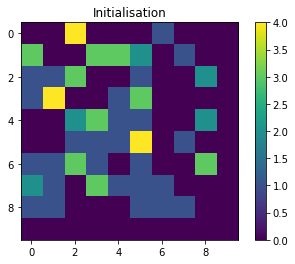

<__main__.RandomWalker object at 0x119b85a10>: gain of 0
<__main__.RandomWalker object at 0x119b85850>: gain of 0
<__main__.RandomWalker object at 0x119b85250>: gain of 0
<__main__.RandomWalker object at 0x119b85890>: gain of 2
<__main__.RandomWalker object at 0x119b85a10>: gain of 0
<__main__.RandomWalker object at 0x119b85850>: gain of 0
<__main__.RandomWalker object at 0x119b85850>: gain of 0
<__main__.RandomWalker object at 0x119b85a10>: gain of 0
<__main__.RandomWalker object at 0x119b85150>: gain of 2
<__main__.RandomWalker object at 0x119b858d0>: gain of 0
<__main__.RandomWalker object at 0x119b858d0>: gain of 0
<__main__.RandomWalker object at 0x119b85150>: gain of 2
<__main__.RandomWalker object at 0x119b85190>: gain of 0
<__main__.RandomWalker object at 0x119b85690>: gain of 2
<__main__.RandomWalker object at 0x119b857d0>: gain of 1.0
<__main__.RandomWalker object at 0x119b85290>: gain of 1.0
<__main__.RandomWalker object at 0x119b856d0>: gain of 1.0
<__main__.RandomWalker ob

TypeError: list indices must be integers or slices, not NoneType

In [10]:
GRID_SIZE = 10
INIT_N_AGENTS = 25
INIT_N_FOOD = 50
INIT_ENERGY = 1
FOOD_ENERGY = 2
N_STEPS = 20
COST_STEP = 0.1
N_FOOD = 1
REPRODUCTION_THRESHOLD=5
PAYOFF_MATRIX=[[[0,0],[1,0]],
               [[0,1],[0.5,0.5]]]


tester = Experiment_Model(GRID_SIZE, GRID_SIZE)

# Create a RandomWalker, so that we can call the random_move() method
for i in range(INIT_N_AGENTS):
    tester.new_agent(RandomWalker, random_pos(GRID_SIZE), INIT_ENERGY,np.random.randint(0,2))
for i in range(INIT_N_FOOD):
    tester.new_agent(Food, random_pos(GRID_SIZE), FOOD_ENERGY)

plot_state(tester, "Initialisation")

for i in range(N_STEPS):
    tester.step()
    plot_title = "Step " + str(i)
    #plot_state(tester, plot_title+ ': Number of Agents',plot='A')
#     plot_state(tester, plot_title+ ': Obtainable energy (food)',plot='F')
#     plot_state(tester, plot_title+ ': Energy of random walkers',plot='R')